# Exercise 2 - Complex Networks
## Author: Aleix Solanes

Apply at least three different algorithms of community detection to the attached networks. It is not necessary to implement them, you may use any free access programs you like. At least one of the algorithms must be based on the optimization of modularity, and you must use at least two different programs (i.e. do not use all algorithms from the same program).

Some of the provided networks come with a reference partition, obtained from real information of the network. In those cases, you must compare your partitions with the reference ones, using at least the following standard measures: Jaccard Index, Normalized Mutual Information and Normalized Variation of Information. Once again, you don't need to implement them, they can be calculated e.g. using Radatools.

In [83]:
import igraph,cairo
import community
import louvain
import networkx as nx
# model
net_model_1 = igraph.read("networks/model/256_4_4_2_15_18_p.net",format="pajek")
net_model_2 = igraph.read("networks/model/256_4_4_4_13_18_p.net",format="pajek")
net_model_3 = igraph.read("networks/model/rb125.net",format="pajek")

clu_model_1 = igraph.read("networks/model/256_4_4_2_15_18_p.clu",format="pajek")
clu_model_2 = igraph.read("networks/model/256_4_4_4_13_18_p.clu",format="pajek")
clu_model_3_1 = igraph.read("networks/model/rb125-1.clu",format="pajek")
clu_model_3_2 = igraph.read("networks/model/rb125-2.clu",format="pajek")
clu_model_3_3 = igraph.read("networks/model/rb125-3.clu",format="pajek")

# real
net_airports = igraph.read("networks/real/airports_UW.net",format="pajek")
net_cortex = igraph.read("networks/real/cat_cortex_sim.net",format="pajek")
net_dolphins = igraph.read("networks/real/dolphins.net",format="pajek")
net_football = igraph.read("networks/real/football.net",format="pajek")
net_zachary = igraph.read("networks/real/zachary_unwh.net",format="pajek")

clu_cortex = igraph.read("networks/real/cat_cortex_sim.clu",format="pajek")
clu_dolphins = igraph.read("networks/real/dolphins-real.clu",format="pajek")
clu_football = igraph.read("networks/real/football-conferences.clu",format="pajek")
clu_zachary = igraph.read("networks/real/zachary_unwh-real.clu",format="pajek")

# toy
net_20x2 = igraph.read("networks/toy/20x2+5x2.net",format="pajek")
net_313 = igraph.read("networks/toy/graph3+1+3.net",format="pajek")
net_4x4 = igraph.read("networks/toy/graph4+4.net",format="pajek")
net_star = igraph.read("networks/toy/star.net",format="pajek")

clu_20x2 = igraph.read("networks/toy/20x2+5x2.clu",format="pajek")
clu_313 = igraph.read("networks/toy/graph3+1+3.clu",format="pajek")
clu_4x4 = igraph.read("networks/toy/graph4+4.clu",format="pajek")
clu_star = igraph.read("networks/toy/star.clu",format="pajek")

# function to export to .clu
def export_to_clu(list1):
    for a in list1:
        

## Algorithms for community detection
### Community structure based on the multilevel algorithm of Blondel et al.
This is a bottom-up algorithm: initially every vertex belongs to a separate community, and vertices are moved between communities iteratively in a way that maximizes the vertices' local contribution to the overall modularity score. When a consensus is reached (i.e. no single move would increase the modularity score), every community in the original graph is shrank to a single vertex (while keeping the total weight of the adjacent edges) and the process continues on the next level. The algorithm stops when it is not possible to increase the modularity any more after shrinking the communities to vertices.

## Real networks

### Dolphins

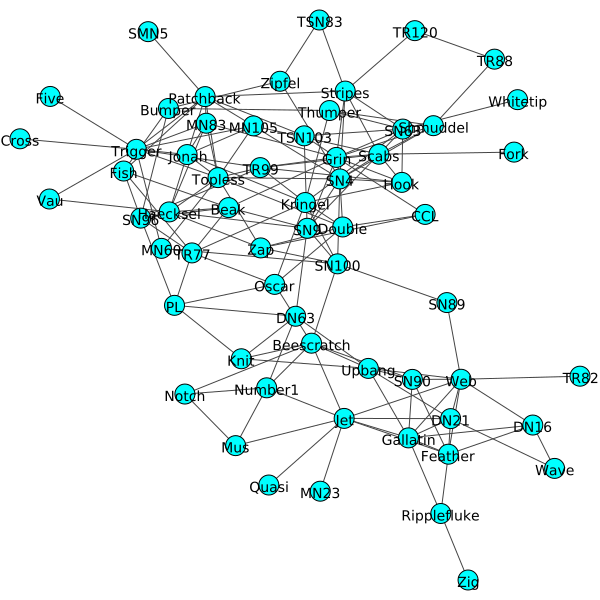

In [79]:
dolphin_layout = net_dolphins.layout("kk")
labels = [vertex['id'] for vertex in net_dolphins.vs]
igraph.plot(net_dolphins, "net_dolphins.png", vertex_color="cyan", vertex_label = labels, layout = dolphin_layout)

In [97]:
# Community multilevel
com_dolphins = net_dolphins.community_multilevel()
print "Community:"
print com_dolphins
print "Membership:"
print com_dolphins.membership
print "Number of communities:", max(com_dolphins.membership)+1
mem_dolphins = com_dolphins.membership
print "Modularity:", com_dolphins.modularity
igraph.plot(com_dolphins,"clu_multilevel_dolphins.png", vertex_label=labels,layout = dolphin_layout)
igraph.write_pajek(mem_dolphins,"dolphins_multilevel.clu")

Community:
Clustering with 62 elements and 5 clusters
[0] 0, 2, 10, 42, 47, 53, 61
[1] 1, 7, 19, 25, 26, 27, 28, 30
[2] 12, 14, 16, 20, 33, 34, 36, 37, 38, 39, 40, 43, 44, 46, 49, 50, 52, 58
[3] 5, 6, 9, 13, 17, 22, 31, 32, 41, 48, 54, 56, 57, 60
[4] 3, 4, 8, 11, 15, 18, 21, 23, 24, 29, 35, 45, 51, 55, 59
Membership:
[0, 1, 0, 4, 4, 3, 3, 1, 4, 3, 0, 4, 2, 3, 2, 4, 2, 3, 4, 1, 2, 4, 3, 4, 4, 1, 1, 1, 1, 4, 1, 3, 3, 2, 2, 4, 2, 2, 2, 2, 2, 3, 0, 2, 2, 4, 2, 0, 3, 2, 2, 4, 2, 0, 3, 4, 3, 3, 2, 4, 3, 0]
Number of communities: 5
Modularity: 0.518531703651


AttributeError: 'module' object has no attribute 'write_pajek'

Optimanl number of clusters: 4
Community:
Clustering with 62 elements and 4 clusters
[0] 0, 2, 10, 12, 14, 16, 20, 33, 34, 37, 38, 40, 42, 43, 44, 46, 47, 49, 50,
    52, 53, 58, 61
[1] 1, 5, 6, 7, 9, 13, 17, 19, 22, 25, 26, 27, 28, 30, 31, 32, 41, 48, 54, 56,
    57, 60
[2] 3, 4, 8, 11, 15, 18, 21, 23, 24, 29, 35, 45, 51, 55, 59
[3] 36, 39
Membership:
[0, 1, 0, 4, 4, 3, 3, 1, 4, 3, 0, 4, 2, 3, 2, 4, 2, 3, 4, 1, 2, 4, 3, 4, 4, 1, 1, 1, 1, 4, 1, 3, 3, 2, 2, 4, 2, 2, 2, 2, 2, 3, 0, 2, 2, 4, 2, 0, 3, 2, 2, 4, 2, 0, 3, 4, 3, 3, 2, 4, 3, 0]
Number of communities: 4
Modularity: 0.495490684704


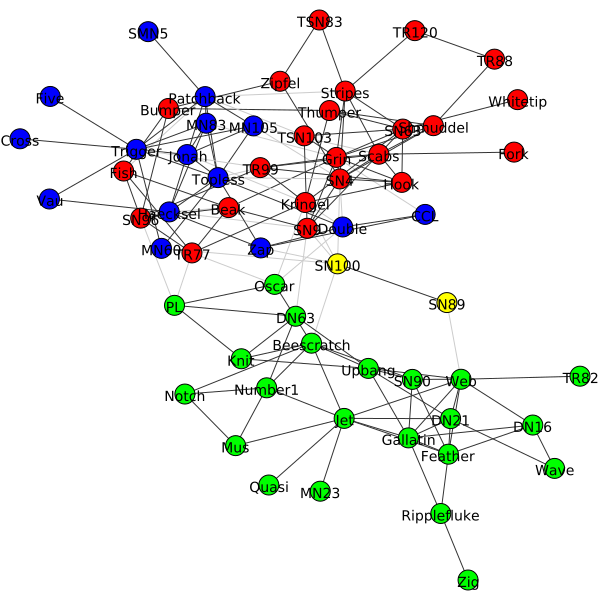

In [81]:
# Community fastgreedy
com_dolphins = net_dolphins.community_fastgreedy().as_clustering()
print "Optimanl number of clusters:",net_dolphins.community_fastgreedy().optimal_count
print "Community:"
print com_dolphins
print "Membership:"
print community.membership
print "Number of communities:", max(com_dolphins.membership)+1
mem_dolphins = com_dolphins.membership
print "Modularity:", com_dolphins.modularity
igraph.plot(com_dolphins,"clu_fastgreedy_dolphins.png", vertex_label=labels,layout = dolphin_layout)

 Community:
Clustering with 62 elements and 5 clusters
[0] 12, 14, 16, 20, 33, 34, 37, 38, 40, 43, 44, 46, 49, 50, 52, 53, 58, 61
[1] 1, 5, 6, 9, 13, 17, 22, 25, 26, 27, 31, 32, 41, 48, 54, 56, 57, 60
[2] 4, 11, 15, 18, 21, 23, 24, 29, 35, 45, 51, 55
[3] 0, 2, 7, 10, 19, 30, 42, 47
[4] 3, 8, 28, 36, 39, 59
Quality: 155.435522866
Modularity: 0.518828369131


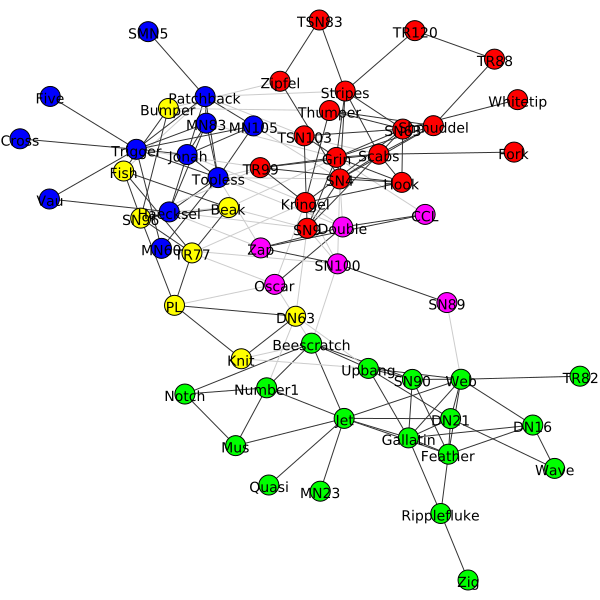

In [89]:
# Louvain
com_dolphins = louvain.find_partition(net_dolphins, method='Modularity')
print "Community:"
print com_dolphins
print "Quality:", louvain.quality(net_dolphins, com_dolphins, method='Significance')
print "Modularity:", com_dolphins.modularity
igraph.plot(com_dolphins,"clu_louvain_dolphins.png", vertex_label=labels,layout = dolphin_layout)